In [1]:
import numpy as np
import tensorflow as tf
import keras
from sklearn.metrics import precision_recall_curve
import seaborn as sb
import datagen
import ensemble_functions
from matplotlib import pyplot

Using TensorFlow backend.


# Data selection

In tnis experiment, we are going to take a look at the distribution of random choices made by the numpy random choice function and see how training and performance is influenced by selecting different boundaries from which the slices are picked. The training has been done separately in the `training_ensemble_unets` notebook.

In [2]:
slices_from_patient = 7
num_patients = 239

In [6]:
def make_choices(slices_from, slices_to, slices_from_patient, num_choices):
    a = list()
    for i in range(num_choices):
        a.append(np.random.choice(range(slices_from, slices_to), slices_from_patient, replace=False))
    a = np.matrix.flatten(np.array(a))
    return a

In [13]:
# Slices from the whole range
s1 = make_choices(60, 100, slices_from_patient, num_patients)

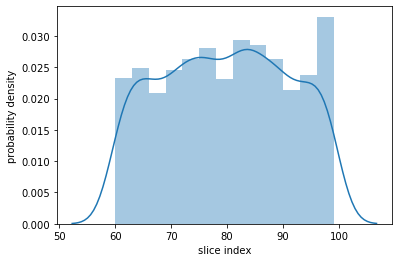

In [20]:
ax = sb.distplot(s1)
ax.set(xlabel='slice index', ylabel='probability density')
pyplot.show()

### Method evaluation

In [2]:
image_size = 240
num_slices = 155
num_patients = 33
final_mask_threshold = None
verbose = 1
path="../models/experiment_dataselection/"
model_name="all_ensemble"

In [3]:
x_val, y_val = datagen.get_whole_patient(number=num_patients, 
                    file_path='../dataset/', 
                    mode='test', 
                    glioma_type=['HGG', 'LGG'], 
                    image_size=240                     
                    )

In [23]:
ensemble_functions.evaluate_ensemble(x_val, y_val, path, model_name, num_patients, image_size, final_mask_threshold, verbose)

Loading model ../models/experiment_dataselection/all_ensemble_1.h5
Loading model ../models/experiment_dataselection/all_ensemble_2.h5
Loading model ../models/experiment_dataselection/all_ensemble_3.h5
Loading model ../models/experiment_dataselection/all_ensemble_4.h5
Models loaded
Evaluating patient 0
Model 1 predictions
155/155 [==============================] - 9s 55ms/step
Model 2 predictions
155/155 [==============================] - 2s 13ms/step
Model 3 predictions
155/155 [==============================] - 2s 13ms/step
Model 4 predictions
155/155 [==============================] - 2s 13ms/step
Evaluating patient 1
Model 1 predictions
155/155 [==============================] - 2s 13ms/step
Model 2 predictions
155/155 [==============================] - 2s 12ms/step
Model 3 predictions
155/155 [==============================] - 2s 12ms/step
Model 4 predictions
155/155 [==============================] - 2s 12ms/step
Evaluating patient 2
Model 1 predictions
155/155 [==================

Model 2 predictions
155/155 [==============================] - 2s 12ms/step
Model 3 predictions
155/155 [==============================] - 2s 13ms/step
Model 4 predictions
155/155 [==============================] - 2s 13ms/step
Evaluating patient 25
Model 1 predictions
155/155 [==============================] - 2s 13ms/step
Model 2 predictions
155/155 [==============================] - 2s 13ms/step
Model 3 predictions
155/155 [==============================] - 2s 13ms/step
Model 4 predictions
155/155 [==============================] - 2s 13ms/step
Evaluating patient 26


IndexError: index 26 is out of bounds for axis 0 with size 26

# Threshold for final segmentation

In this experiment we are going to find an optimal threshold for the final mask creation.

In [ ]:
num_patients = 10
x_val, y_val = datagen.get_whole_patient(number=num_patients, 
                    file_path='../dataset/', 
                    mode='test', 
                    glioma_type=['HGG'], 
                    image_size=240                     
                    )

In [73]:

tumor_region = 4

In [74]:
m = keras.models.load_model("../models/base_d_5/1_ensemble_{}.h5".format(tumor_region))

In [75]:
masks = []
predictions = []
for p in range(num_patients):
    y = datagen.convert_labels(y_val[p][0][60:100], tumor_region, 240)
    p = m.predict(np.array(x_val[p][60:100]))
    masks.append(y)
    predictions.append(p)
masks = np.concatenate(masks)
predictions = np.concatenate(predictions)
    

In [76]:
precision, recall, threshold = precision_recall_curve(np.ndarray.flatten(masks), np.ndarray.flatten(predictions))

In [103]:
score = 0.765832
index = np.where((precision>=score) & (recall>=score))
print(index)
index = index[0][5]

(array([5247421, 5247422, 5247423, 5247424, 5247425, 5247426], dtype=int64),)


C:\Users\krcma\.conda\envs\tfgpu\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


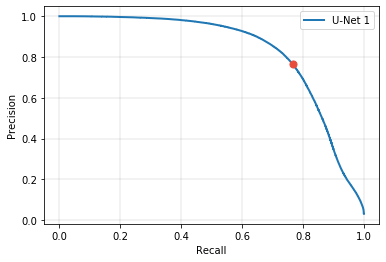

Selected threshold value is 0.5738325715065002


In [104]:
pyplot.plot(recall, precision, label='U-Net 1', linewidth=2)
pyplot.scatter(recall[index], precision[index], s=50, c="#e74c3c", zorder=10)
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.grid(color='grey', linestyle='-', linewidth=0.2)
pyplot.show()

print("Selected threshold value is {}".format(threshold[index]))

### Results 

tumor 1: 0.5956302881240845  
tumor 2: 0.42085739970207214  
tumor 3: 0.6085834503173828  
tumor 4: 0.5738325715065002

In [ ]:
score = 0.739325

In [5]:
m = {}
tumor_regions = ["whole", "core", "enhancing"]
# path = "C:\Users\krcma\Desktop\models\base_d_5_new"

for t in tumor_regions:
    m[t] = keras.models.load_model("C:/Users/krcma/Desktop/models/base_d_5_new/1_ensemble_{}.h5".format(t))

In [5]:
for i in range(1, 5):
    print(i)
    m[i] = keras.models.load_model("../models/base_d_5/1_ensemble_{}.h5".format(i))

1
2
3
4


In [6]:
x_val.shape

(26, 155, 4, 240, 240)

In [7]:
x_val[0][87].shape

(4, 240, 240)

In [8]:
p = {}

In [33]:
for i in ["whole", "core", "enhancing"]:
    print(i)
    p[i] = m[i].predict(np.array([x_val[3][102]]))

whole
core
enhancing


In [34]:
x_val.shape

(10, 155, 4, 240, 240)

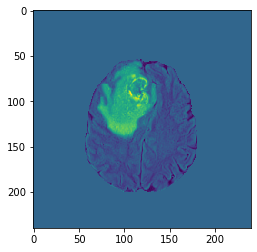

In [35]:
imgplot = pyplot.imshow(x_val[3][102][0])
pyplot.show()

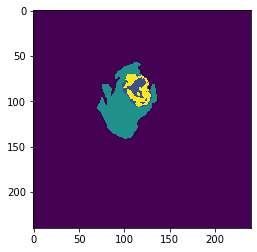

In [36]:
imgplot = pyplot.imshow(y_val[3][0][102][0])
pyplot.show()

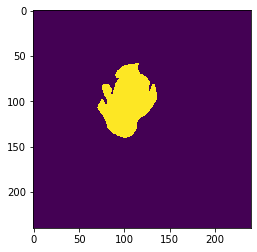

In [37]:
pat = np.zeros((240, 240)) 
pat[p["whole"][0][0] >= 0.564] = 1
imgplot = pyplot.imshow(pat)
pyplot.show()

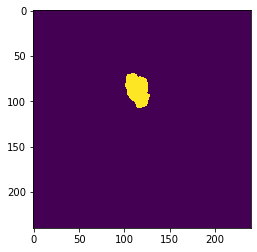

In [38]:
pat = np.zeros((240, 240)) 
pat[p["core"][0][0] >= 0.564] = 1
imgplot = pyplot.imshow(pat)
pyplot.show()

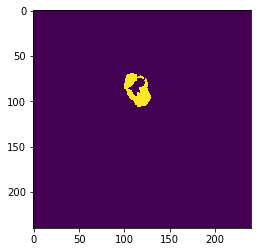

In [39]:
pat = np.zeros((240, 240)) 
pat[p["enhancing"][0][0] >= 0.564] = 1
imgplot = pyplot.imshow(pat)
pyplot.show()

In [32]:
fmask = ensemble_functions.create_mask(p, 1, 240, p=0.564)

ValueError: could not convert string to float: 'whole'

In [44]:
fmask =  np.zeros((240,240))
fmask[p["whole"][0][0] > 0.564] = 1
fmask[p["core"][0][0] > 0.564] = 2
fmask[p["enhancing"][0][0] > 0.564] = 4

[0. 1. 2. 4.]


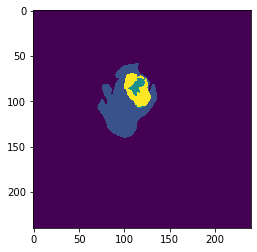

In [45]:
print(np.unique(fmask))
imgplot = pyplot.imshow(fmask)
pyplot.show()

[0. 1. 2. 4.]


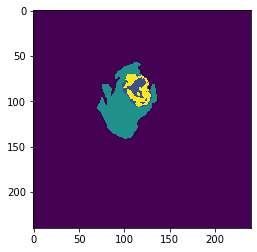

In [47]:
mask = y_val[3][0][102][0]

mm = np.zeros((240, 240))
mm[mask == 1] = 1
mm[mask == 2] = 2
mm[mask == 4] = 4
print(np.unique(mm))
imgplot = pyplot.imshow(mm)
pyplot.show()

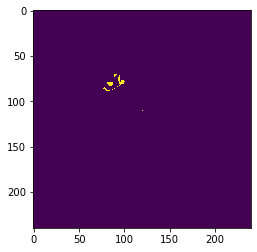

In [18]:
pat = y_val[2][0][87][0]
imgplot = pyplot.imshow(pat == 1)
pyplot.show()

In [8]:
def evaluate_ensemble(x_val, y_val, models, image_size, final_mask_threshold, verbose):
    # Evaluation pipeline:
    
    tumor_regions = ["enhancing", "whole", "core"]

    evaluations = {
        "enhancing": [],
        "whole": [],
        "core": []
    }
    
    if verbose:
        print("Models loaded")

    for i in range(num_patients):
        
        if verbose:
            print("Evaluating patient {}".format(i))
        
        predictions = {}
        for t in tumor_regions:
            print(t)
            predictions[t] = models[t].predict(x_val[i])
        
        # Create final mask
        final_mask = np.zeros((num_slices, 1, image_size, image_size))
        for idx, t in enumerate(tumor_regions):
            print(idx, t)
            final_mask[predictions[t] >= 0.564] = idx + 1 
        
        for tumor_region in tumor_regions:
            evaluations[tumor_region].append(ensemble_functions.evaluate_tumor_region(y_val[i][0], final_mask, image_size, tumor_region))

    results = {}
    for tumor_region in tumor_regions:
        results[tumor_region] = {
            "mean": round(np.array(evaluations[tumor_region]).mean() * 100, 2),
            "stdDev": round(np.std(np.array(evaluations[tumor_region])) * 100, 2),
            "median": round(np.median(np.array(evaluations[tumor_region])) * 100, 2)
        }

    # Cleanup
    del models
    del predictions
    
    return results

In [6]:
path = "C:/Users/krcma/Desktop/models/base_d_5_new/"
model_name = "1_ensemble"
tumor_regions = ["whole", "core", "enhancing"]
models = {}
for t in tumor_regions:
    models[t] = keras.models.load_model(path + "/" + model_name + "_{}.h5".format(t))

In [9]:
r = evaluate_ensemble(x_val, y_val, 
                      models,
                      image_size, 
                      final_mask_threshold, 
                      1)

Models loaded
Evaluating patient 0
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 1
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 2
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 3
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 4
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 5
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 6
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 7
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 8
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 9
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 10
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 11
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 12
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patient 13
enhancing
whole
core
0 enhancing
1 whole
2 core
Evaluating patie

In [10]:
r

{'enhancing': {'mean': 9.19, 'stdDev': 28.72, 'median': 0.01},
 'whole': {'mean': 84.4, 'stdDev': 9.8, 'median': 87.99},
 'core': {'mean': 66.56, 'stdDev': 27.87, 'median': 79.85}}